In [1]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv('placement.csv')

In [29]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [31]:
df.shape

(100, 4)

In [34]:
df = df.iloc[:,1:]

In [35]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [36]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [37]:
import matplotlib.pyplot as plt

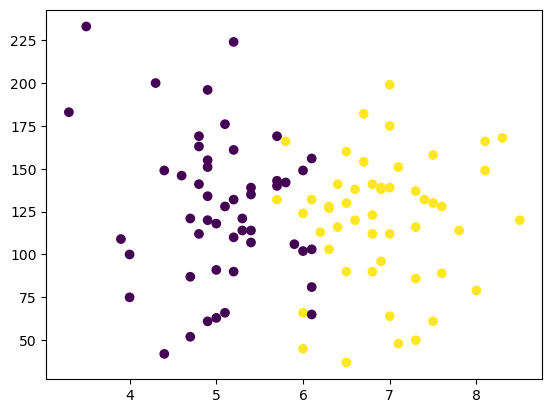

In [39]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [40]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [42]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [43]:
y.shape

(100,)

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [51]:
X_train

,cgpa,iq
17,3.3,183.0
39,4.6,146.0
32,7.0,139.0
98,6.3,103.0
88,4.4,149.0
...,...,...
36,5.7,140.0
56,6.1,65.0
41,5.4,114.0
67,5.0,118.0


In [46]:
y_train

74    1
62    0
97    1
85    1
58    1
     ..
87    1
13    1
19    0
15    0
65    1
Name: placement, Length: 90, dtype: int64

In [49]:
X_test

,cgpa,iq
25,5.0,91.0
1,5.9,106.0
2,5.3,121.0
91,7.5,158.0
14,6.1,103.0
82,6.5,37.0
10,6.0,45.0
40,4.9,134.0
84,5.7,169.0
22,4.9,120.0


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)

In [55]:
X_train

array([[-2.36246521,  1.51230254],
       [-1.2402223 ,  0.56923747],
       [ 0.83161077,  0.39081976],
       [ 0.22732613, -0.52675706],
       [-1.41287505,  0.64570221],
       [ 0.48630526, -0.0934569 ],
       [ 0.83161077,  1.92011446],
       [-0.03165301,  0.64570221],
       [ 0.83161077,  1.30839658],
       [-0.80859041, -1.46982213],
       [-0.72226403,  0.95156115],
       [-0.98124316,  0.6966787 ],
       [ 0.39997888, -0.85810425],
       [-0.29063214,  0.21240204],
       [ 0.7452844 ,  0.36533151],
       [ 0.91793715, -1.92861054],
       [ 0.14099975, -0.27187461],
       [-0.11797938, -0.45029233],
       [-0.98124316,  0.79863168],
       [-0.72226403,  2.55732058],
       [ 0.05467337, -0.52675706],
       [-0.03165301, -2.00507527],
       [ 0.65895802, -0.01699216],
       [-1.06756954,  1.00253764],
       [-0.63593765, -0.24638637],
       [ 0.31365251, -0.19540988],
       [ 0.05467337, -1.08749845],
       [-1.49920143,  1.9456027 ],
       [-0.03165301,

In [56]:
X_test = scaler.transform(X_test)

In [57]:
X_test

array([[ 0.39997888,  0.16142555],
       [ 0.7452844 , -0.70517478],
       [-1.15389592, -1.82665756],
       [-1.15389592, -0.93456898],
       [-0.98124316,  1.84364972],
       [-0.72226403, -0.85810425],
       [ 0.57263164,  0.77314343],
       [ 0.05467337,  0.82411992],
       [-0.89491679, -0.832616  ],
       [-0.80859041,  1.33388482]])

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf = LogisticRegression()

In [62]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred = clf.predict(X_test)

In [66]:
y_test

57    1
66    1
94    0
23    0
80    0
28    0
74    1
8     0
25    0
15    0
Name: placement, dtype: int64

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test,y_pred)

0.9

In [72]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

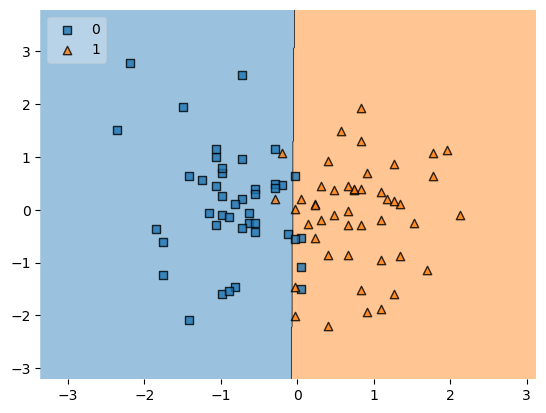

In [73]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [74]:
import pickle

In [75]:
pickle.dump(clf,open('model.pkl','wb'))